In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing the dataset
df= pd.read_csv(r'D:\Aniket\TE Mini Project\european_soccer.csv')
X = df.iloc[:,:-1].values
Y = df.iloc[:,14].values

In [4]:
X

array([['Standard', 'Waregem', 1, ..., nan, nan, nan],
       ['Anderlecht', 'Eupen', 4, ..., nan, nan, nan],
       ['Kortrijk', 'Club Brugge', 1, ..., nan, nan, nan],
       ...,
       ['Bochum', 'Karlsruhe', 3, ..., 11.0, 5.0, 7.0],
       ['Sassuolo', 'Inter', 3, ..., 17.0, 5.0, 7.0],
       ['Marseille', 'Strasbourg', 2, ..., 15.0, 5.0, 7.0]], dtype=object)

In [5]:
Y

array(['D', 'H', 'H', ..., 'D', 'A', 'H'], dtype=object)

In [6]:
#taking care of missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')
imputer = imputer.fit(X[:, 2:14])
X[:, 2:14] = imputer.transform(X[:, 2:14])

In [7]:
from sklearn import preprocessing
labelencoder_Y = preprocessing.LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [8]:
Y.astype(int)

array([1, 2, 2, ..., 1, 0, 2])

In [9]:
X = np.delete(X, np.s_[0:2], axis=1)
np.size(X, 1)

12

In [10]:
#splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [11]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 21, metric = 'euclidean', p = 2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [12]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [13]:
y_pred

array([1, 0, 2, ..., 0, 1, 2])

In [14]:
Y_test

array([1, 0, 2, ..., 1, 1, 2])

In [15]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[2547  404  160]
 [ 441 1749  747]
 [ 107  331 4616]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      3111
           1       0.70      0.60      0.65      2937
           2       0.84      0.91      0.87      5054

    accuracy                           0.80     11102
   macro avg       0.79      0.78      0.78     11102
weighted avg       0.80      0.80      0.80     11102



In [24]:
df.mean()

FTHG     1.490884
FTAG     1.142147
HTHG     0.651548
HTAG     0.492143
HS      13.141832
AS      10.646645
HST      5.051649
AST      4.087058
HF      12.549523
AF      13.035023
HC       5.741415
AC       4.618583
dtype: float64

In [25]:
Y.shape

(55506,)

In [26]:
df

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,FTR
0,Standard,Waregem,1,1,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D
1,Anderlecht,Eupen,4,1,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H
2,Kortrijk,Club Brugge,1,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H
3,Mechelen,Lokeren,2,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H
4,St Truiden,Lierse,1,0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55501,Parma,Genoa,5,1,3.0,0.0,15.0,11.0,7.0,6.0,9.0,12.0,3.0,7.0,H
55502,Milan,Lecce,2,2,1.0,0.0,18.0,11.0,8.0,7.0,13.0,12.0,8.0,2.0,D
55503,Bochum,Karlsruhe,3,3,3.0,2.0,19.0,18.0,7.0,6.0,14.0,11.0,5.0,7.0,D
55504,Sassuolo,Inter,3,4,1.0,3.0,7.0,10.0,4.0,7.0,14.0,17.0,5.0,7.0,A


In [27]:
df=df.drop(['HomeTeam','AwayTeam'], axis=1)

In [28]:
df['FTR']=labelencoder_Y.fit_transform(df['FTR'])

In [29]:
df

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,FTR
0,1,1,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,4,1,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,1,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,2,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,1,0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55501,5,1,3.0,0.0,15.0,11.0,7.0,6.0,9.0,12.0,3.0,7.0,2
55502,2,2,1.0,0.0,18.0,11.0,8.0,7.0,13.0,12.0,8.0,2.0,1
55503,3,3,3.0,2.0,19.0,18.0,7.0,6.0,14.0,11.0,5.0,7.0,1
55504,3,4,1.0,3.0,7.0,10.0,4.0,7.0,14.0,17.0,5.0,7.0,0


In [35]:
df=df.apply(lambda x: x.fillna(x.value_counts()),axis=1)

In [36]:
df

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,FTR
0,1.0,1.0,0.0,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,1.0
1,4.0,1.0,0.0,1.0,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,2.0
2,1.0,0.0,0.0,0.0,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,2.0
3,2.0,0.0,0.0,0.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,2.0
4,1.0,0.0,1.0,0.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55501,5.0,1.0,3.0,0.0,15.0,11.0,7.0,6.0,9.0,12.0,3.0,7.0,2.0
55502,2.0,2.0,1.0,0.0,18.0,11.0,8.0,7.0,13.0,12.0,8.0,2.0,1.0
55503,3.0,3.0,3.0,2.0,19.0,18.0,7.0,6.0,14.0,11.0,5.0,7.0,1.0
55504,3.0,4.0,1.0,3.0,7.0,10.0,4.0,7.0,14.0,17.0,5.0,7.0,0.0


C:\Users\Aniket\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Aniket\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


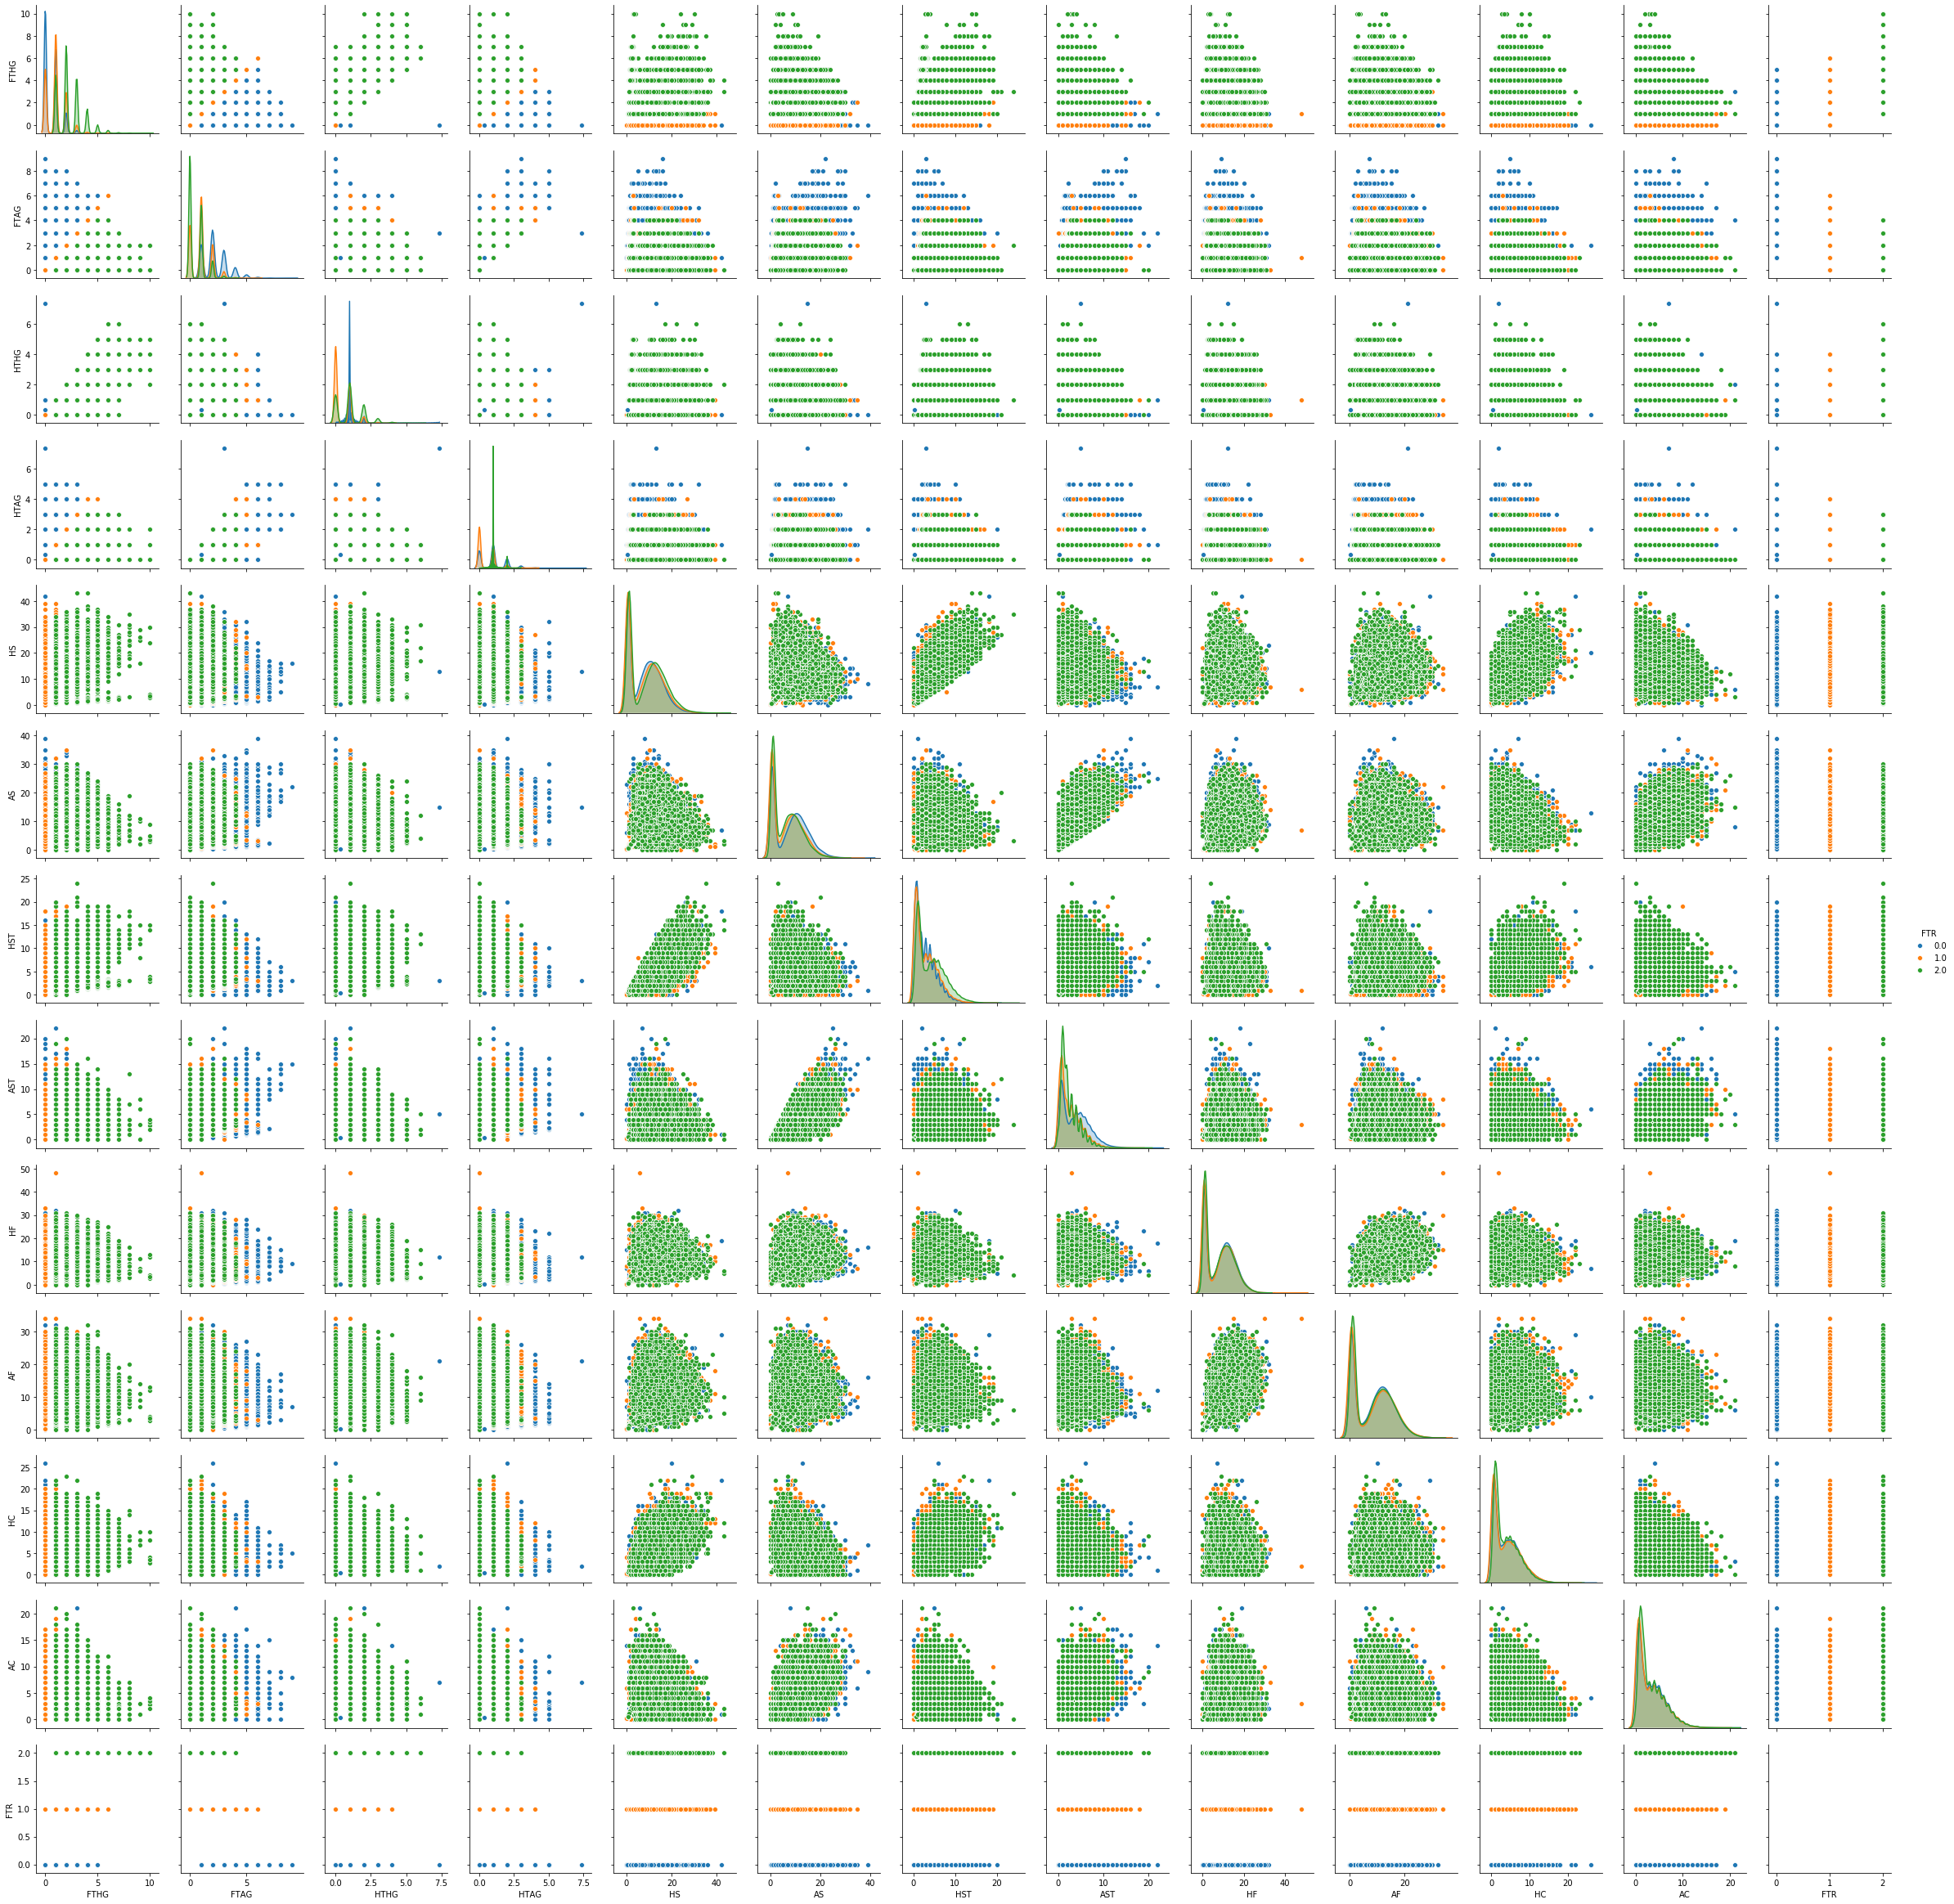

In [37]:
g = sns.pairplot(df, hue='FTR')

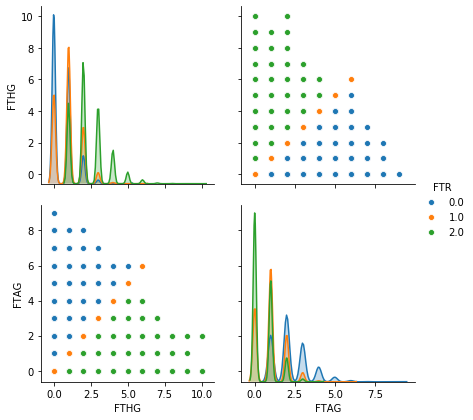

In [38]:
g = sns.pairplot(df, hue = 'FTR',height=3, vars = ['FTHG','FTAG'])

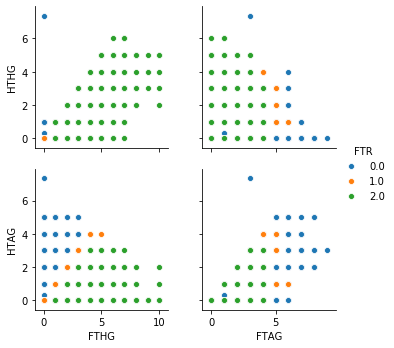

In [39]:
g = sns.pairplot(df, hue='FTR', x_vars=['FTHG','FTAG'], y_vars = ['HTHG','HTAG'])

C:\Users\Aniket\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Aniket\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


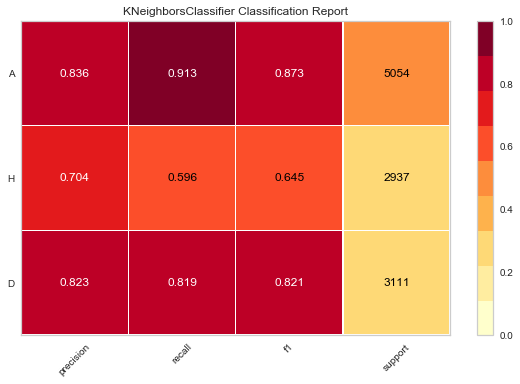

In [40]:
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy


classes = ["D","H", "A"]


visualizer = ClassificationReport(classifier, classes=classes, support=True)

visualizer.fit(X_train, Y_train)        # Fit the visualizer and the model
visualizer.score(X_test, Y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55506 entries, 0 to 55505
Data columns (total 13 columns):
FTHG    55506 non-null float64
FTAG    55506 non-null float64
HTHG    55506 non-null float64
HTAG    55506 non-null float64
HS      55506 non-null float64
AS      55506 non-null float64
HST     55506 non-null float64
AST     55506 non-null float64
HF      55506 non-null float64
AF      55506 non-null float64
HC      55506 non-null float64
AC      55506 non-null float64
FTR     55506 non-null float64
dtypes: float64(13)
memory usage: 5.5 MB


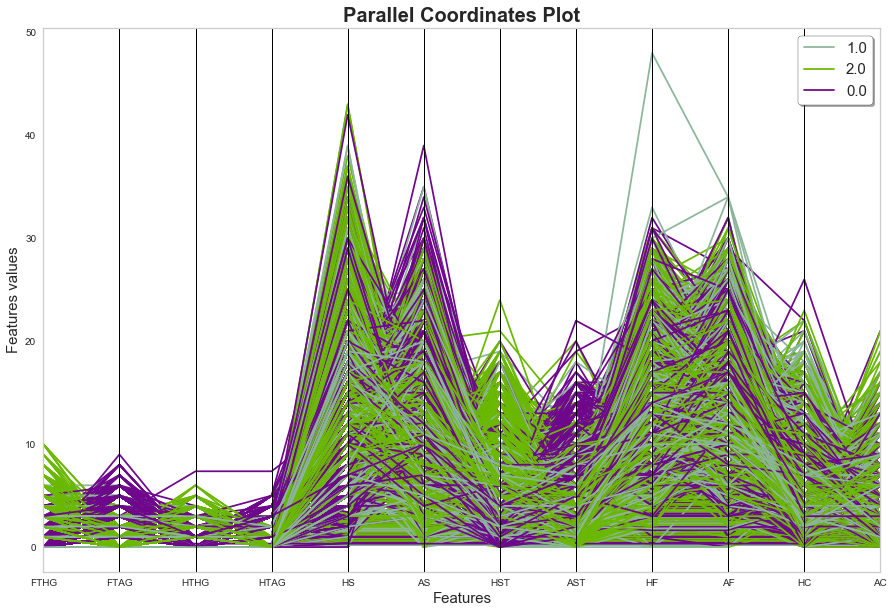

In [42]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(frame= df,class_column="FTR")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

<Figure size 576x396 with 0 Axes>

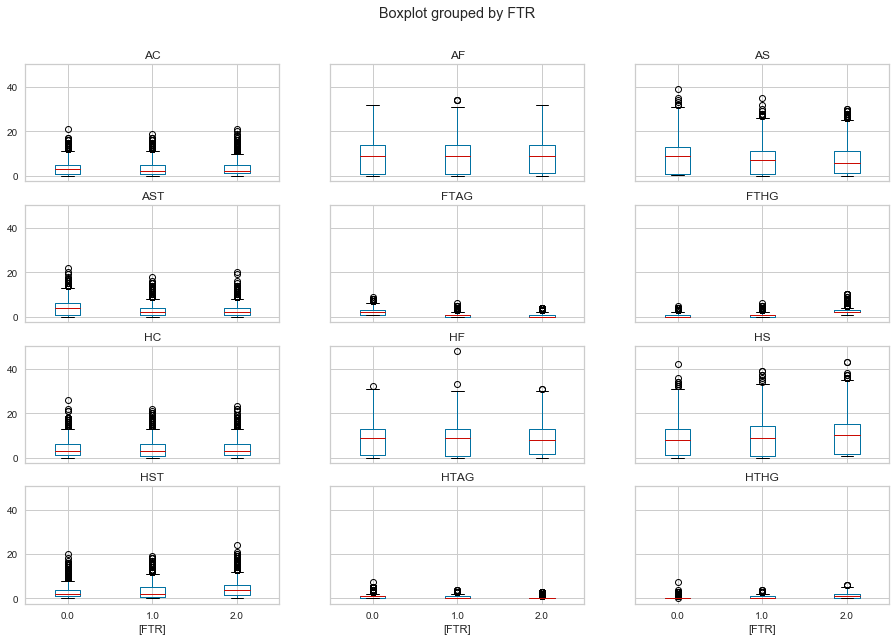

In [43]:
plt.figure()
df.boxplot(by="FTR", figsize=(15, 10))
plt.show()